# K - Nearest Neighbour Classifier

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X, y = make_classification(n_samples=1000,n_features=3, n_redundant=1, n_classes=2, random_state=999)

In [3]:
X

array([[-0.33504974,  0.02852654,  1.16193084],
       [-1.37746253, -0.4058213 ,  0.44359618],
       [-1.04520026, -0.72334759, -3.10470423],
       ...,
       [-0.75602574, -0.51816111, -2.20382324],
       [ 0.56066316, -0.07335845, -2.15660348],
       [-1.87521902, -1.11380394, -4.04620773]])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
classifier=KNeighborsClassifier(n_neighbors=5,algorithm='auto')

In [6]:
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [7]:
y_pred=classifier.predict(X_test)

In [8]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[158  20]
 [ 11 141]]
0.906060606060606
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       178
           1       0.88      0.93      0.90       152

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



## Finding the best value of 'K' for upto n=10

In [9]:
best_k = 0
best_accuracy = 0
accuracies = []

In [10]:
for k in range(1, 11):
    classifier = KNeighborsClassifier(n_neighbors=k, algorithm='auto')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Update best k if the current accuracy is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

In [11]:
print(f"Best k: {best_k}")
print(f"Best accuracy: {best_accuracy}")

Best k: 7
Best accuracy: 0.9151515151515152


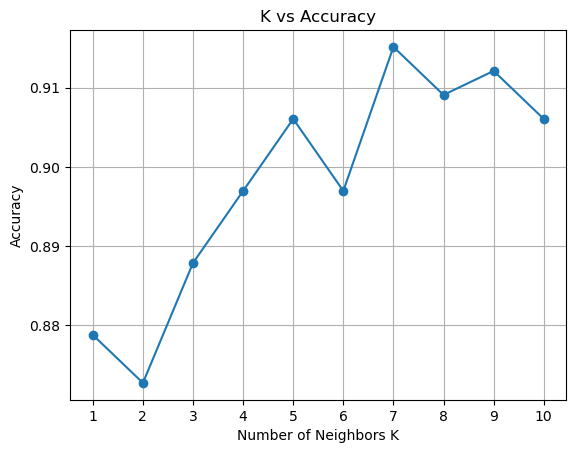

In [12]:
plt.plot(range(1, 11), accuracies, marker='o')
plt.title('K vs Accuracy')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))
plt.grid()
plt.show()